In [1]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as p
import spinmob as s
import scipy.io

In [182]:
def lorentz(x, x0,g0, x1,g1, x2,g2, x3,g3, x4,g4):
    y=0
    g0_sqr = np.square(g0)
    denom = np.pi * g0 * ((x-x0)**2 + g0_sqr)
    y += g0_sqr/denom
    
    g1_sqr = np.square(g1)
    denom = np.pi * g1 * ((x-x1)**2 + g1_sqr)
    y += g1_sqr/denom
    
    g2_sqr = np.square(g2)
    denom = np.pi * g2 * ((x-x2)**2 + g2_sqr)
    y += g2_sqr/denom
    
    g3_sqr = np.square(g3)
    denom = np.pi * g3 * ((x-x3)**2 + g3_sqr)
    y += g3_sqr/denom    
    
    g4_sqr = np.square(g4)
    denom = np.pi * g4 * ((x-x4)**2 + g4_sqr)
    y += g4_sqr/denom
    return y

In [197]:
amps = np.load('data/300_800_0.5.npy')/95.6
freq = np.linspace(300,800,len(amps))
x = freq[180:660]
y = amps[180:660]

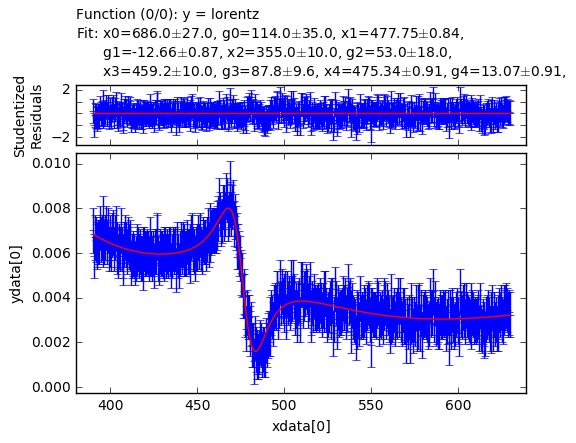


SETTINGS
  autoplot        False
  coarsen         [1]
  first_figure    0
  fpoints         [1000]
  plot_bg         [True]
  plot_ey         [True]
  plot_fit        [True]
  plot_guess      [False]
  plot_guess_zoom [False]
  scale_eydata    [1.0]
  silent          [False]
  style_bg        [{'ls': '-', 'color': 'k', 'marker': ''}]
  style_data      [{'ls': '', 'color': 'b', 'marker': '+'}]
  style_fit       [{'ls': '-', 'color': 'r', 'marker': ''}]
  style_guess     [{'ls': '-', 'color': '0.25', 'marker': ''}]
  subtract_bg     [False]
  xlabel          [None]
  xmax            [629.5]
  xmin            [390.0]
  xscale          ['linear']
  ylabel          [None]
  ymax            [0.0091004184100418415]
  ymin            [0.0011506276150627616]
  yscale          ['linear']

CONSTANTS

GUESS (reduced chi squared = [ 1060.])
  x0         = 490.0
  g0         = 4.0
  x1         = 400.0
  g1         = 4.0
  x2         = 420.0
  g2         = 4.0
  x3         = 430.0
  g3         = 4.

In [203]:
fitter = s.data.fitter(f = lorentz, 
                       p = 'x0=490, g0=4, x1=400, g1=4, x2=420, g2=4, x3=430, g3=4, x4=440, g4=4',
                       plot_guess=False, autoplot=False)
fitter.set_data(xdata=x, ydata=y, eydata=0.001)
fitter.fit()
fitter.plot()

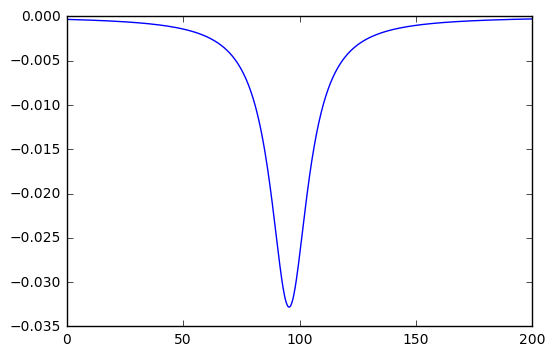

In [204]:
def one_lorentz(x, x0, g0):
    g0_sqr = np.square(g0)
    denom = np.pi * g0 * ((x-x0)**2 + g0_sqr)
    return g0_sqr/denom

p.figure()
xone = np.linspace(0,200,1000)
onelore = one_lorentz(xone,95.5,-9.7)
p.plot(xone,onelore)
p.show()

In [22]:
from scipy.special import wofz
def V(x, x0 ,alpha, gamma):
    """
    Return the Voigt line shape at x with Lorentzian component HWHM gamma
    and Gaussian component HWHM alpha.

    """
    sigma = alpha / np.sqrt(2 * np.log(2))

    return np.real(wofz(((x-x0) + 1j*gamma)/sigma/np.sqrt(2))) / sigma\
                                                           /np.sqrt(2*np.pi) + 0.025

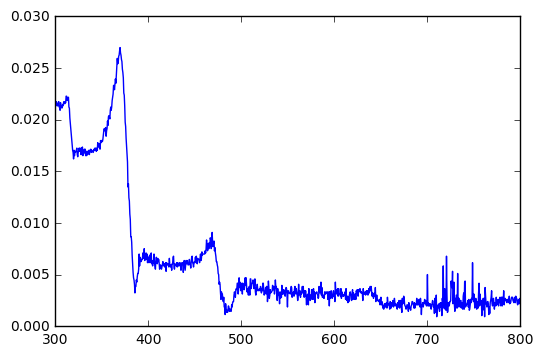

In [151]:
p.figure()
p.plot(freq,amps)
p.show()

In [122]:
(np.load('data/300_800_0.5.npy')/95.6)[322]

0.0073221757322175732

In [196]:
np.where(freq==630)

(array([660]),)